In [3]:
from copy import deepcopy
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import ticker
import seaborn as sns
#import prody as pr
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

/tmp/ipykernel_65950/1133266272.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [8]:
df = pd.read_excel(r'/media/roberto/Roberton/elkin /engelbert/TABLA MATRIZ Proy Engelbert _Roberto_enero 2022.xlsx', sheet_name='Plan1')
df.head(2)

,CODIGO,Institución,Ciudad,EDAD,sexo,Glicemia,INTERPRETACION_Glicemia,Colesterol_total,Colesterol_total_INTERPRETACION,Colesterol_HDL,...,RIESG_CARDIOVACULAR,Anti_Estreptolisina,VALOR_NOMINAL_Estreptolisina,INTERPRETACIÓN_Estreptolisina,PCR / mg/L,VALOR NOMINAL_PCR,INTERPRETACIÓN_PCR,FR/ UI/ml,VALOR NOMINAL_ FR,INTERPRETACIÓN_ FR
0,CIU1,UCC,S_MTA,23.0,M,83,NORMAL,214,ELEVADO,34,...,MAXIMO,201,NEGATIVO,NORMAL,6.1,NEGATIVO,NORMAL,10.1,NEGATIVO,NORMAL
1,CIU2,UCC,S_MTA,19.0,F,81,NORMAL,215,ELEVADO,46,...,MAXIMO,201,NEGATIVO,NORMAL,6.1,NEGATIVO,NORMAL,10.1,NEGATIVO,NORMAL


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CODIGO                           130 non-null    object 
 1   Institución                      130 non-null    object 
 2   Ciudad                           130 non-null    object 
 3   EDAD                             129 non-null    float64
 4   sexo                             130 non-null    object 
 5   Glicemia                         130 non-null    int64  
 6   INTERPRETACION_Glicemia          130 non-null    object 
 7   Colesterol_total                 130 non-null    int64  
 8   Colesterol_total_INTERPRETACION  130 non-null    object 
 9   Colesterol_HDL                   130 non-null    int64  
 10  Colesterol_HDL_INTERPRETACION    130 non-null    object 
 11  RIESG_CARDIOVACULAR              130 non-null    object 
 12  Anti_Estreptolisina   

In [13]:
df2 = df.drop(df.columns[[0]], axis=1)

In [124]:
df3 = df.drop(df.columns[[0,1,2,4,6,8,10,13,14,16,17,19,20]], axis=1)
df3.head(2) 

,EDAD,Glicemia,Colesterol_total,Colesterol_HDL,RIESG_CARDIOVACULAR,Anti_Estreptolisina,PCR / mg/L,FR/ UI/ml
0,23.0,83,214,34,MAXIMO,201,6.1,10.1
1,19.0,81,215,46,MAXIMO,201,6.1,10.1


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt 

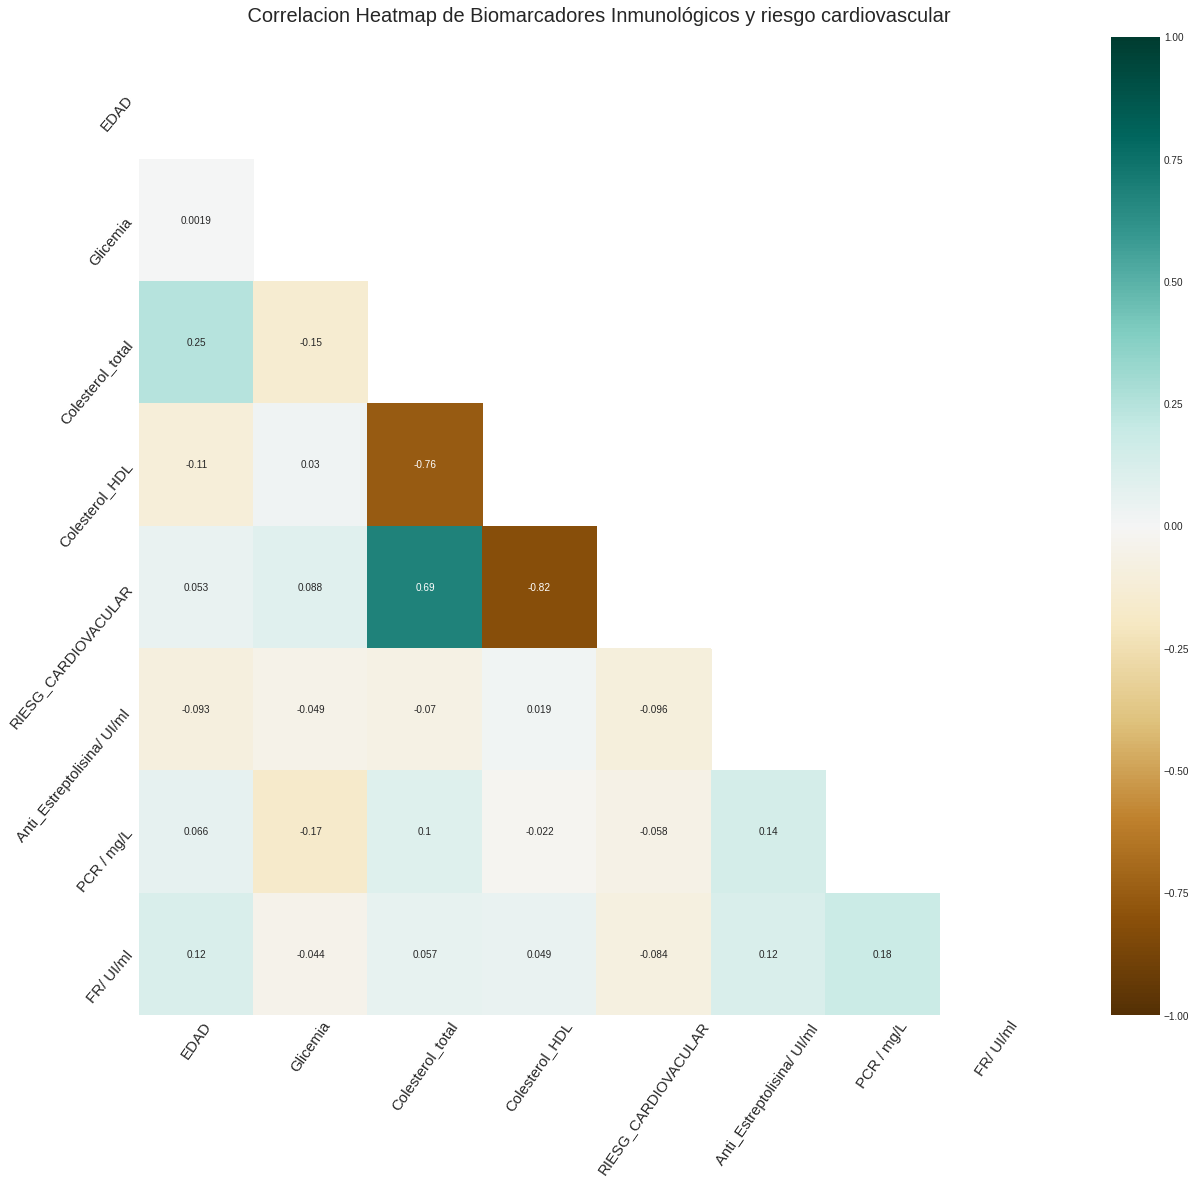

In [99]:



plt.figure(figsize=(20.5, 18))
#https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df2.corr('spearman'), dtype=np.bool))
heatmap = sns.heatmap(df2.corr('spearman'), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title(' Correlacion Heatmap de Biomarcadores Inmunológicos y riesgo cardiovascular', fontdict={'fontsize':20}, pad=15);
plt.xticks(rotation=55)
plt.yticks(rotation=50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('Correlacion sperman Heatmap.png', dpi=500)

In [90]:
df2.filter(items=['RIESG_CARDIOVACULAR','EDAD']).corr('spearman')

,RIESG_CARDIOVACULAR,EDAD
RIESG_CARDIOVACULAR,1.00000,0.05284
EDAD,0.05284,1.00000


In [89]:
df2.filter(items=['RIESG_CARDIOVACULAR','EDAD']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RIESG_CARDIOVACULAR  130 non-null    float64
 1   EDAD                 129 non-null    float64
dtypes: float64(2)
memory usage: 2.2 KB


In [141]:
df2['RIESG_CARDIOVACULAR'] = df2['RIESG_CARDIOVACULAR'].astype(object)

In [102]:
df3['RIESG_CARDIOVACULAR'].unique()

array(['MAXIMO', 'ALTO', 'MODERADO', 'BAJO'], dtype=object)

In [85]:
df2['RIESG_CARDIOVACULAR']=np.where(df2['RIESG_CARDIOVACULAR'] =='MAXIMO','4',df2['RIESG_CARDIOVACULAR'])

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation
#from pandas.compat import StringIO

sns.set(style="whitegrid")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MAXIMO v.s. ALTO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.715e+02
MODERADO v.s. BAJO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.255e+02
ALTO v.s. MODERADO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=6.830e+02
MAXIMO v.s. BAJO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.930e+02


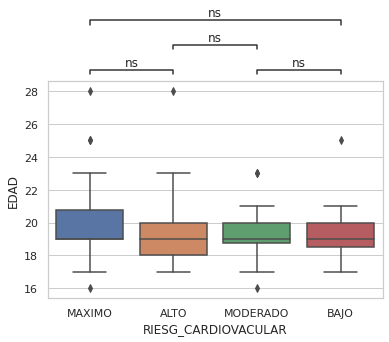

In [106]:

ax = sns.boxplot( x=df3['RIESG_CARDIOVACULAR'], y=df3['EDAD'])
ax, test_results = add_stat_annotation(ax, x=df3['RIESG_CARDIOVACULAR'], y=df3['EDAD'], 
                                     
                                   box_pairs=[('MAXIMO', 'ALTO'), ('MODERADO', 'BAJO'), ('MAXIMO', 'BAJO'),('ALTO', 'MODERADO')],
                                   test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
plt.savefig('RIESG_CARDIOVACULAR_EDAD.png', dpi=300, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MAXIMO v.s. ALTO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.789e-03 U_stat=7.585e+02
MODERADO v.s. BAJO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.575e+02
ALTO v.s. MODERADO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.883e-02 U_stat=5.165e+02
MAXIMO v.s. BAJO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.107e-02 U_stat=4.860e+02


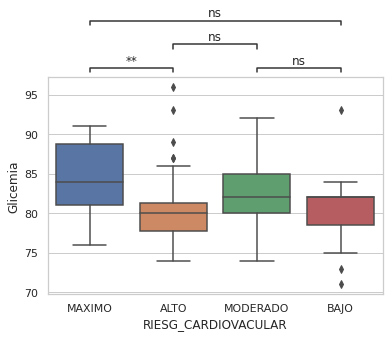

In [107]:

ax = sns.boxplot( x=df3['RIESG_CARDIOVACULAR'], y=df3['Glicemia'])
ax, test_results = add_stat_annotation(ax, x=df3['RIESG_CARDIOVACULAR'], y=df3['Glicemia'], 
                                     
                                   box_pairs=[('MAXIMO', 'ALTO'), ('MODERADO', 'BAJO'), ('MAXIMO', 'BAJO'),('ALTO', 'MODERADO')],
                                   test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
plt.savefig('RIESG_CARDIOVACULAR_Glicemia.png', dpi=300, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MAXIMO v.s. ALTO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.920e+02
MODERADO v.s. BAJO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.215e-04 U_stat=7.830e+02
ALTO v.s. MODERADO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.140e-07 U_stat=1.254e+03
MAXIMO v.s. BAJO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.106e-09 U_stat=7.020e+02


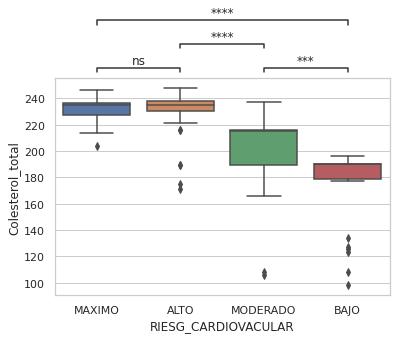

In [113]:
#Colesterol_total	Colesterol_HDL	RIESG_CARDIOVACULAR	Anti_Estreptolisina/ UI/ml	PCR / mg/L	FR/ UI/ml
ax = sns.boxplot( x=df3['RIESG_CARDIOVACULAR'], y=df3['Colesterol_total'])
ax, test_results = add_stat_annotation(ax, x=df3['RIESG_CARDIOVACULAR'], y=df3['Colesterol_total'], 
                                     
                                   box_pairs=[('MAXIMO', 'ALTO'), ('MODERADO', 'BAJO'), ('MAXIMO', 'BAJO'),('ALTO', 'MODERADO')],
                                   test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
plt.savefig('RIESG_CARDIOVACULAR_Colesterol_total.png', dpi=300, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MAXIMO v.s. ALTO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.020e-04 U_stat=2.000e+02
MODERADO v.s. BAJO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.033e-04 U_stat=2.195e+02
ALTO v.s. MODERADO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.870e-08 U_stat=1.660e+02
MAXIMO v.s. BAJO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.288e-09 U_stat=0.000e+00


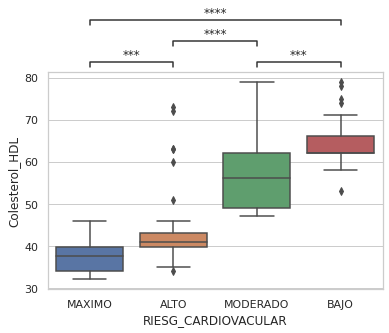

In [112]:
#Colesterol_HDL	RIESG_CARDIOVACULAR	Anti_Estreptolisina/ UI/ml	PCR / mg/L	FR/ UI/ml
ax = sns.boxplot( x=df3['RIESG_CARDIOVACULAR'], y=df3['Colesterol_HDL'])
ax, test_results = add_stat_annotation(ax, x=df3['RIESG_CARDIOVACULAR'], y=df3['Colesterol_HDL'], 
                                     
                                   box_pairs=[('MAXIMO', 'ALTO'), ('MODERADO', 'BAJO'), ('MAXIMO', 'BAJO'),('ALTO', 'MODERADO')],
                                   test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
plt.savefig('RIESG_CARDIOVACULAR_Colesterol_HDL.png', dpi=300, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MAXIMO v.s. ALTO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.635e+02
MODERADO v.s. BAJO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.410e+02
ALTO v.s. MODERADO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=7.935e+02
MAXIMO v.s. BAJO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.035e+02


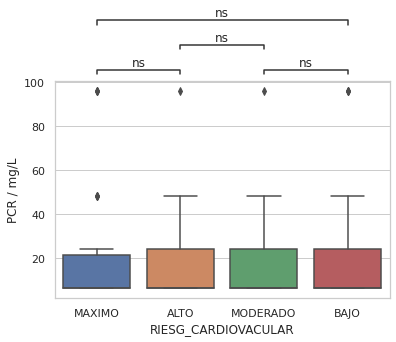

In [115]:
#Colesterol_HDL	RIESG_CARDIOVACULAR	Anti_Estreptolisina/ UI/ml	PCR / mg/L	FR/ UI/ml
ax = sns.boxplot( x=df3['RIESG_CARDIOVACULAR'], y=df3['PCR / mg/L'])
ax, test_results = add_stat_annotation(ax, x=df3['RIESG_CARDIOVACULAR'], y=df3['PCR / mg/L'], 
                                     
                                   box_pairs=[('MAXIMO', 'ALTO'), ('MODERADO', 'BAJO'), ('MAXIMO', 'BAJO'),('ALTO', 'MODERADO')],
                                   test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
plt.savefig('RIESG_CARDIOVACULAR_Anti_PCR.png', dpi=300, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MAXIMO v.s. ALTO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.601e-01 U_stat=4.550e+02
MODERADO v.s. BAJO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.113e-01 U_stat=4.270e+02
ALTO v.s. MODERADO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.569e-01 U_stat=8.310e+02
MAXIMO v.s. BAJO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.815e-01 U_stat=2.990e+02


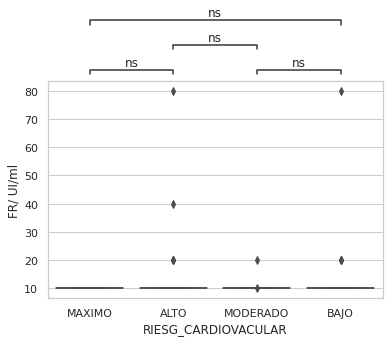

In [116]:
#Colesterol_HDL	RIESG_CARDIOVACULAR	Anti_Estreptolisina/ UI/ml	PCR / mg/L	FR/ UI/ml
ax = sns.boxplot( x=df3['RIESG_CARDIOVACULAR'], y=df3['FR/ UI/ml'])
ax, test_results = add_stat_annotation(ax, x=df3['RIESG_CARDIOVACULAR'], y=df3['FR/ UI/ml'], 
                                     
                                   box_pairs=[('MAXIMO', 'ALTO'), ('MODERADO', 'BAJO'), ('MAXIMO', 'BAJO'),('ALTO', 'MODERADO')],
                                   test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
plt.savefig('RIESG_CARDIOVACULAR_Anti_FR.png', dpi=300, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MAXIMO v.s. ALTO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.454e-01 U_stat=4.005e+02
MODERADO v.s. BAJO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.315e-01 U_stat=3.995e+02
ALTO v.s. MODERADO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.218e-01 U_stat=8.585e+02
MAXIMO v.s. BAJO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.496e-01 U_stat=2.545e+02


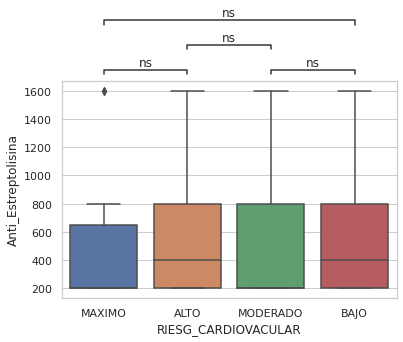

In [126]:
#Colesterol_HDL	RIESG_CARDIOVACULAR	Anti_Estreptolisina/ UI/ml	PCR / mg/L	FR/ UI/ml
ax = sns.boxplot( x=df3['RIESG_CARDIOVACULAR'], y=df3['Anti_Estreptolisina'])
ax, test_results = add_stat_annotation(ax, x=df3['RIESG_CARDIOVACULAR'], y=df3['Anti_Estreptolisina'], 
                                     
                                   box_pairs=[('MAXIMO', 'ALTO'), ('MODERADO', 'BAJO'), ('MAXIMO', 'BAJO'),('ALTO', 'MODERADO')],
                                   test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
plt.savefig('RIESG_CARDIOVACULAR_Anti_Estreptolisina.png', dpi=300, bbox_inches='tight')

In [125]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EDAD                 129 non-null    float64
 1   Glicemia             130 non-null    int64  
 2   Colesterol_total     130 non-null    int64  
 3   Colesterol_HDL       130 non-null    int64  
 4   RIESG_CARDIOVACULAR  130 non-null    object 
 5   Anti_Estreptolisina  130 non-null    int64  
 6   PCR / mg/L           130 non-null    float64
 7   FR/ UI/ml            130 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 8.2+ KB


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [10]:
# test classification dataset
from collections import Counter
from sklearn.datasets import make_classification

In [20]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [23]:
print(df2.dtypes)


Institución                         object
Ciudad                              object
EDAD                               float64
sexo                                object
Glicemia                             int64
INTERPRETACION_Glicemia             object
Colesterol_total                     int64
Colesterol_total_INTERPRETACION     object
Colesterol_HDL                       int64
Colesterol_HDL_INTERPRETACION       object
RIESG_CARDIOVACULAR                 object
Anti_Estreptolisina                  int64
VALOR_NOMINAL_Estreptolisina        object
INTERPRETACIÓN_Estreptolisina       object
PCR / mg/L                          object
VALOR NOMINAL_PCR                   object
INTERPRETACIÓN_PCR                  object
FR/ UI/ml                          float64
VALOR NOMINAL_ FR                   object
INTERPRETACIÓN_ FR                  object
dtype: object


In [30]:
# Create a pandas DataFrame with the target variable
dft = pd.DataFrame({'y_train': ['ALTO', 'BAJO', 'MAXIMO', 'MODERADO']})

# Perform one-hot encoding using pandas
encoded_dft = pd.get_dummies(dft['y_train'])


In [37]:
# Reset indices of encoded_y_train and encoded_X_train
encoded_y_train.reset_index(drop=True, inplace=True)
encoded_X_train.reset_index(drop=True, inplace=True)

# Add constant to the exogenous variable
encoded_X_train = sm.add_constant(encoded_X_train, prepend=True)

# Fit the logistic regression model
model = sm.Logit(endog=encoded_y_train, exog=encoded_X_train)
model = model.fit()

# Predict the probabilities
probs = model.predict(encoded_X_train)

# Convert probabilities to binary predictions
predictions = (probs >= 0.5).astype(int)

# Evaluate the model
accuracy = np.mean(predictions == encoded_y_train)
print("Accuracy:", accuracy)


ValueError: operands could not be broadcast together with shapes (104,4) (104,) 

In [32]:
# Add the encoded variables to the X_train dataset
X_train = sm.add_constant(X_train, prepend=True)

# Fit the logistic regression model
model = sm.Logit(endog=encoded_dft, exog=X_train)
model = model.fit()
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [15]:
# División de los datos en train y test
# ==============================================================================
X = df2.drop('RIESG_CARDIOVACULAR', axis=1)
Y = df2['RIESG_CARDIOVACULAR']
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [27]:
 np.unique( y_train, return_counts=True)
    

(array(['ALTO', 'BAJO', 'MAXIMO', 'MODERADO'], dtype=object),
 array([31, 24, 23, 26]))

In [22]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [143]:
y

0      4.0
1      4.0
2      3.0
3      3.0
4      4.0
      ... 
125    1.0
126    2.0
127    3.0
128    4.0
129    1.0
Name: RIESG_CARDIOVACULAR, Length: 130, dtype: object

In [144]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [145]:
logmodel=LogisticRegression(multi_class='multinomial',solver ='newton-cg').fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').